In [94]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [6]:
#Loading the dataset
df = pd.read_csv('Badanie ankietowe.csv')
df = pd.DataFrame(df)
df.head()

,Sygnatura czasowa,Płeć:,Wiek:,Wykształcenie:,Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną,Proszę zaznaczyć rodzaj prowadzonej działalności HoReCa:,"Województwo, w którym znajduje się hotel/restauracja:",Większość przychodów przed pandemią pochodziło z obsługi:,Czy w ciągu ostatnich 12 miesięcy zauważono spadek przychodów?,Która fala pandemii była bardziej dotkliwa dla przedsiębiorstwa?,...,"Czy wybierając hotel/restaurację kierowałeś się kryterium, które gwarantowało przestrzeganie wytycznych sanitarnych (np. Obiekt bezpieczny higienicznie)?",Czy zauważyłeś zmiany związane z jakością usług podczas pandemii?,"Urlop, wolne weekendy w większości udało się spędzić:",Czy planując pobyt hotelowy musiałeś zrezygnować/zmienić datę pobytu?,Czy w przypadku rezygnacji udało się odzyskać pieniądze z zadatku/zaliczki?,Czy opcja bonu turystycznego zachęciła Cię do spędzenia urlopu w Polsce?,"Czy wprowadzenie dodatkowych obostrzeń (np. zamknięcie basenu, restauracji, siłowni) zniechęciłoby Cię do wyjazdu rekreacyjnego?","Czy strajki przedsiębiorców, akcje zachęcające do ratowania polskiej turystyki oraz informacje płynące z rynku o coraz słabszej sytuacji w finansowej wielu przedsiębiorstw zachęciły Cię do wspierania branży hotelarsko - gastronomicznej",Jak wspierałeś branże hotelarsko – gastronomiczną?,Czy w Twojej ocenie pomoc Rządu była wystarczająca aby pokryć koszty oraz straty spowodowane pandemią COVID-19?
0,2021/04/12 4:05:18 PM EET,Kobieta,16-24 lat,Średnie,Konsument/gość,NaN,NaN,NaN,NaN,NaN,...,Nie,Pozostała na tym samym poziomie.,W domu,Nie dotyczy,Nie dotyczy,Nie dotyczy,Tak,Tak,Regularne zamawianie jedzenia na wynos.,Nie
1,2021/04/12 4:09:38 PM EET,Kobieta,16-24 lat,Średnie,Pracownik,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/04/12 4:13:08 PM EET,Kobieta,41-55 lat,Średnie,Pracownik,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/04/12 4:13:19 PM EET,Kobieta,16-24 lat,Wyższe,Konsument/gość,NaN,NaN,NaN,NaN,NaN,...,Nie,Pozostała na tym samym poziomie.,W domu,Nie dotyczy,Nie dotyczy,Nie dotyczy,Tak,Nie,Nie wspierałem,Nie
4,2021/04/12 4:14:34 PM EET,Kobieta,25-40 lat,Wyższe,Konsument/gość,NaN,NaN,NaN,NaN,NaN,...,Nie,Pozostała na tym samym poziomie.,W domu,Nie dotyczy,Nie dotyczy,Nie dotyczy,Tak,Tak,Regularne zamawianie jedzenia na wynos.,Nie


## Data Preprocesing
I check the appearance of the metrics, whether there are any empty fields, check how many respondents responded according to gender, age, education, and finally I check how many people responded to the survey from 3 different perspectives.

In [9]:
df.shape

(147, 49)

In [8]:
#Dropping the identifier column
df_metrical=df[['Płeć:','Wiek:', 'Wykształcenie:','Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną']]
print(df_metrical)

         Płeć:      Wiek: Wykształcenie:  \
0      Kobieta  16-24 lat        Średnie   
1      Kobieta  16-24 lat        Średnie   
2      Kobieta  41-55 lat        Średnie   
3      Kobieta  16-24 lat         Wyższe   
4      Kobieta  25-40 lat         Wyższe   
..         ...        ...            ...   
142  Mężczyzna  25-40 lat         Wyższe   
143  Mężczyzna  41-55 lat        Średnie   
144    Kobieta  25-40 lat         Wyższe   
145    Kobieta  25-40 lat         Wyższe   
146    Kobieta  25-40 lat        Średnie   

    Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną  
0                                       Konsument/gość                      
1                                            Pracownik                      
2                                            Pracownik                      
3                                       Konsument/gość                      
4                                       Konsument/gość                      
..       

In [5]:
#Checking for empty fields.
if df_metrical.isnull().any().any():
    print("There are empty fields in the dataframe.")
else:
    print("There are no empty fields in the dataframe..")

There are no empty fields in the dataframe..


In [6]:
#Checking responses based on gender.
total_responders=df_metrical['Płeć:'].count()
woman_responders=df_metrical['Płeć:'].value_counts()['Kobieta']
man_respoders=df_metrical['Płeć:'].value_counts()['Mężczyzna']
print(f"In the study, a total of {total_responders} respondents participated, including {woman_responders} women and {man_respoders} mens.")

In the study, a total of 147 respondents participated, including 114 women and 33 mens.


In [7]:
#Checking age intervals
df_metrical['Wiek:'].value_counts()

Wiek:
16-24 lat         69
25-40 lat         55
41-55 lat         16
powyżej 55 lat     7
Name: count, dtype: int64

In [8]:
#Checking the level of education.
df_metrical['Wykształcenie:'].value_counts()

Wykształcenie:
Średnie       75
Wyższe        53
Podstawowe    10
Zawodowe       9
Name: count, dtype: int64

In [11]:
#Checking how many people from different groups responded to the survey questions.
num_of_entrepreneurs=df_metrical['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną'].value_counts()['Osoba zarządzająca obiektem']
num_of_workers=df_metrical['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną'].value_counts()['Pracownik']
num_of_guests=df_metrical['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną'].value_counts()['Konsument/gość']
print(f"The impact of the COVID-19 pandemic on the HoReCa industry was examined from the perspective of {num_of_entrepreneurs} respondents in a managerial position, {num_of_workers} respondents as employees, and {num_of_guests} respondents as consumers/guests.")

The impact of the COVID-19 pandemic on the HoReCa industry was examined from the perspective of 21 respondents in a managerial position, 44 respondents as employees, and 82 respondents as consumers/guests.


## Checking the impact of the COVID-19 pandemic on the HoReCa industry from a managerial perspective.

In [37]:
#Data cleaning, which will pertain only to managerial personnel.
menagerial=(df[df['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną']=='Osoba zarządzająca obiektem']).dropna(axis=1, how='all')
menagerial.shape

(21, 20)

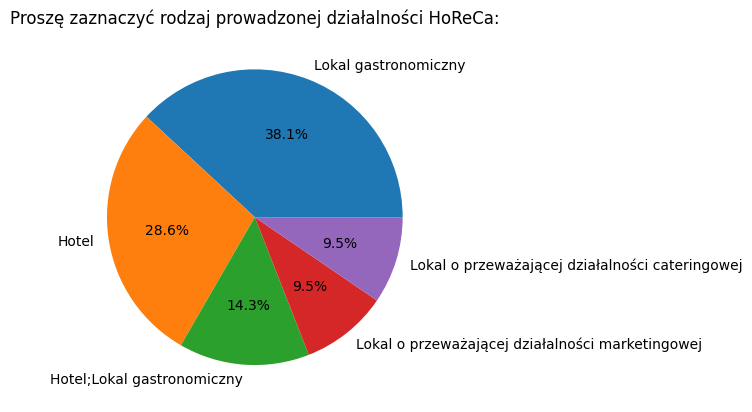

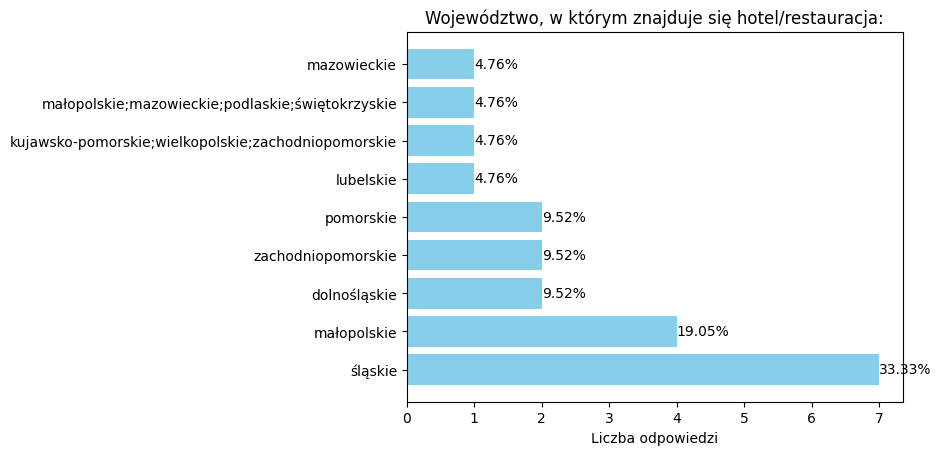

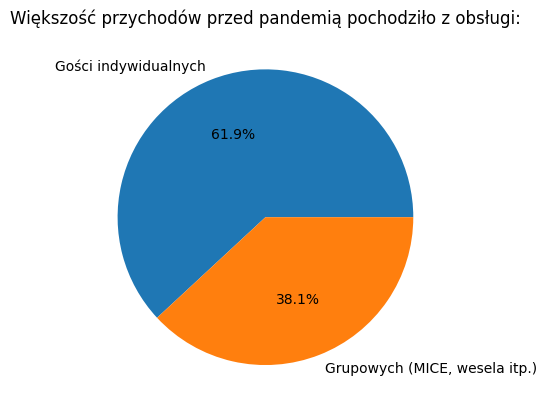

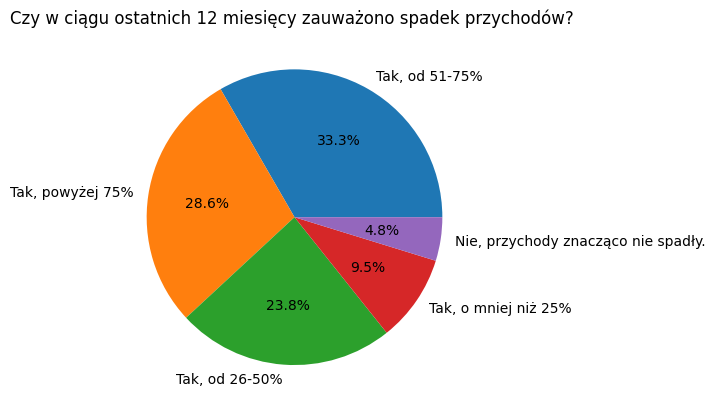

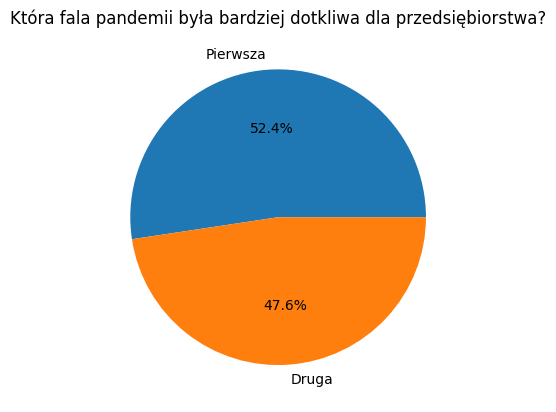

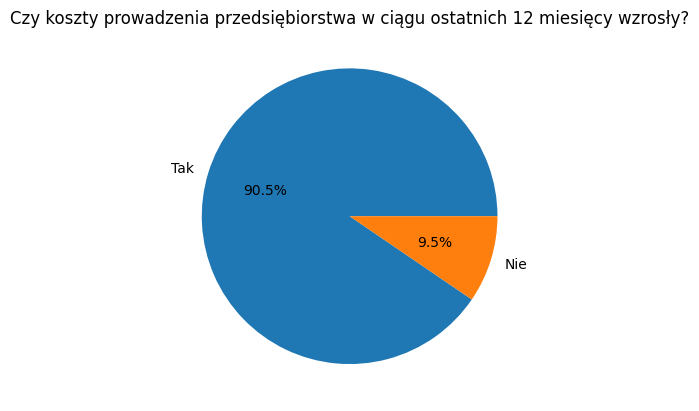

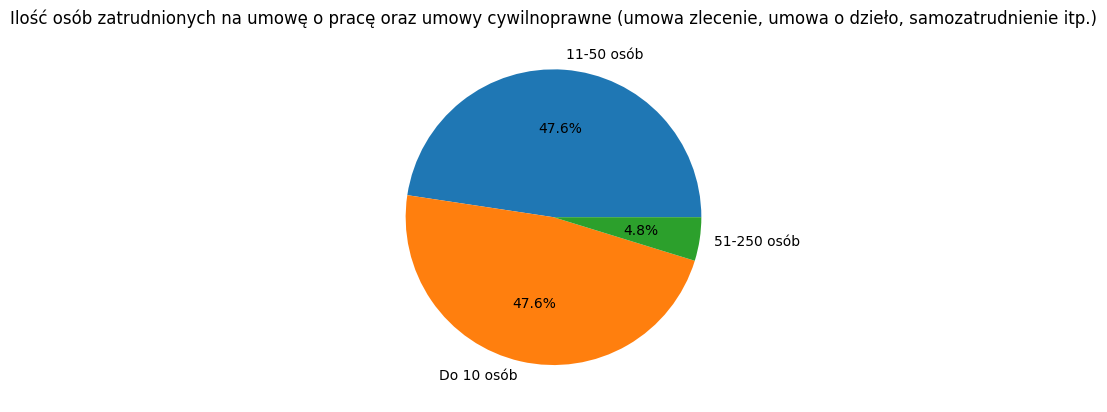

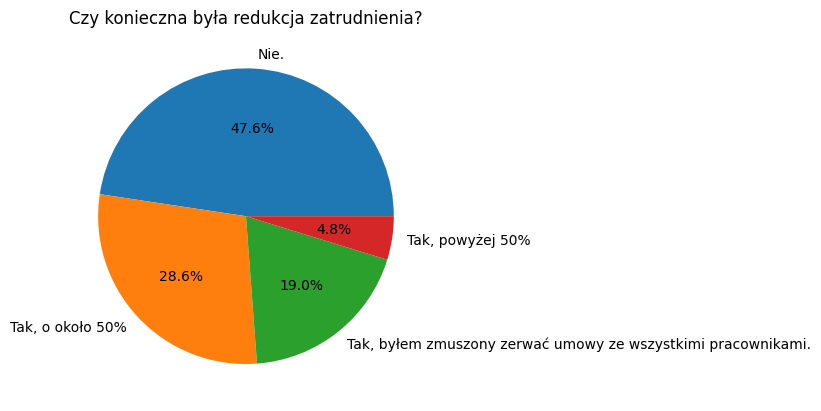

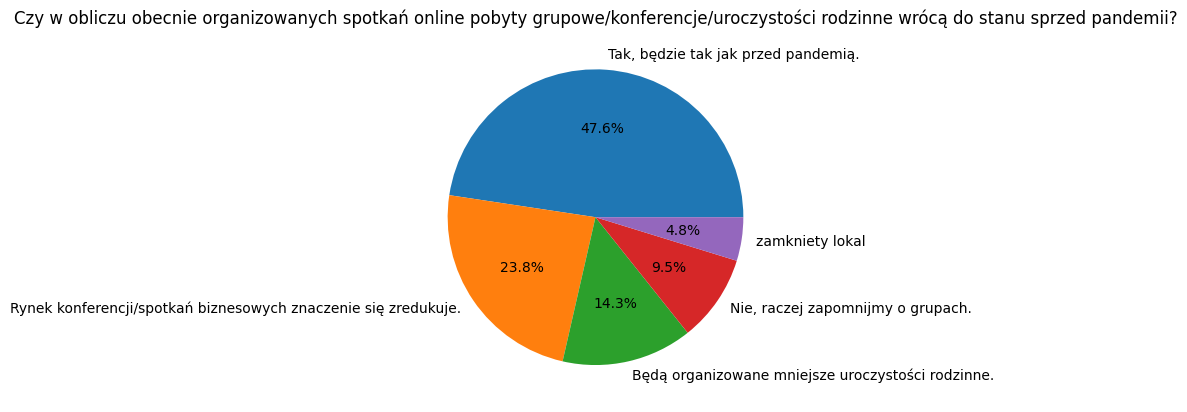

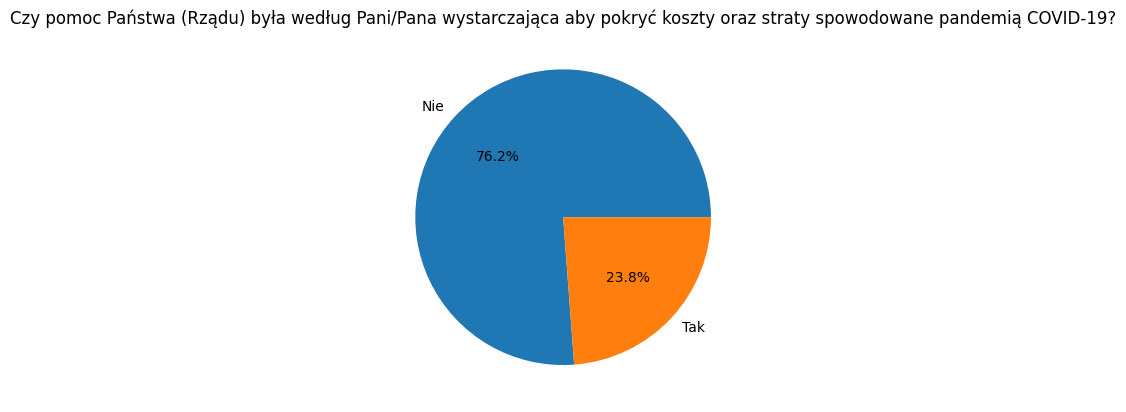

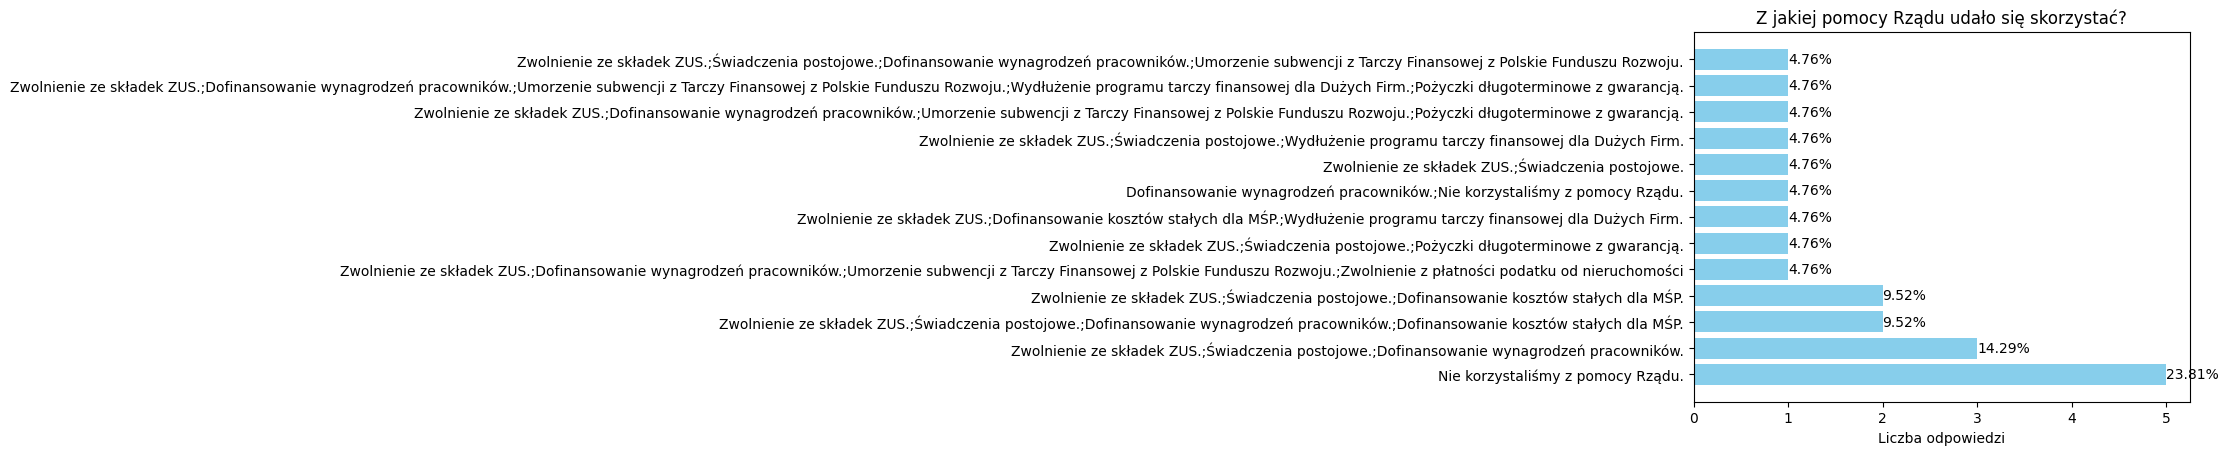

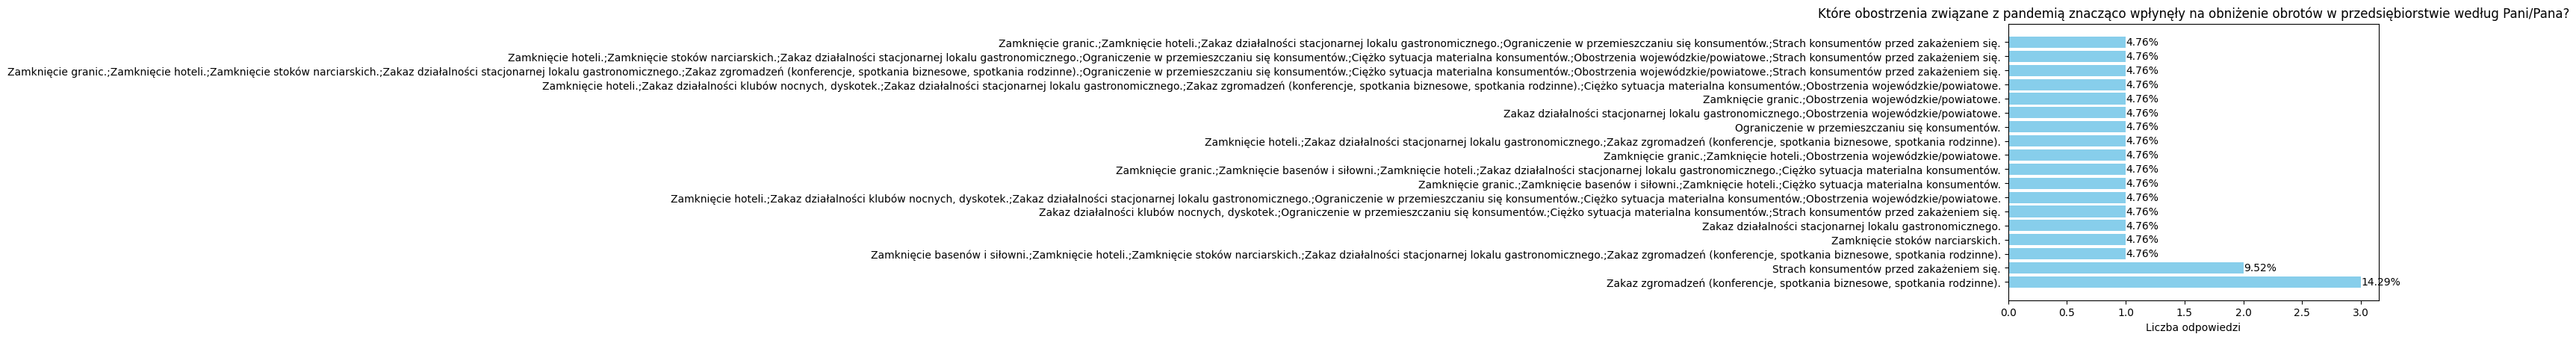

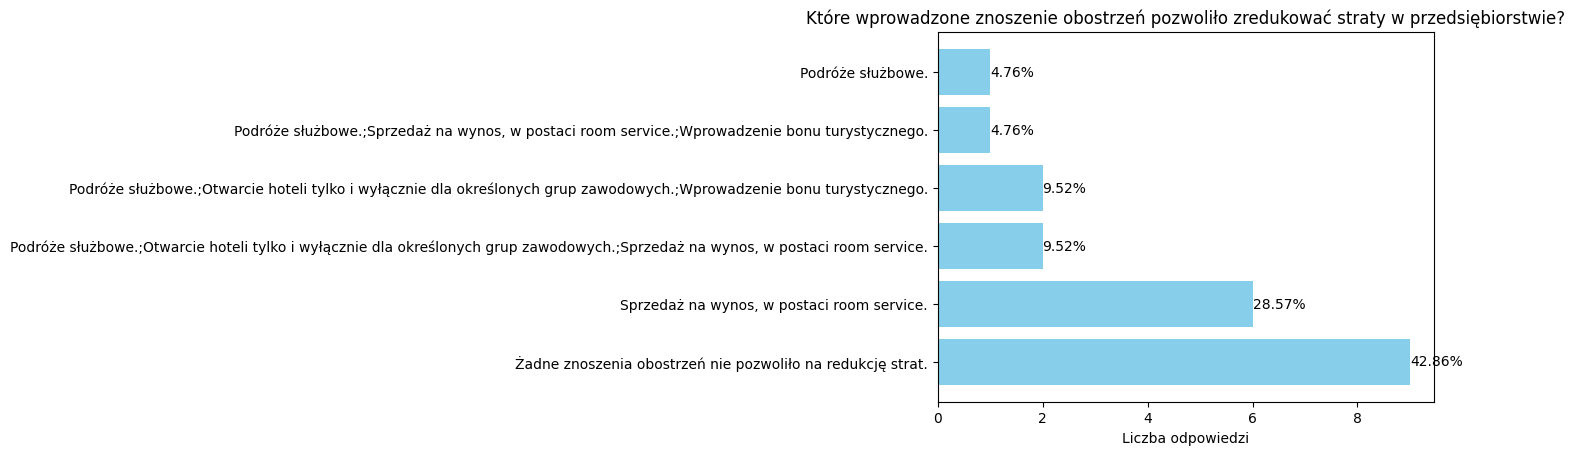

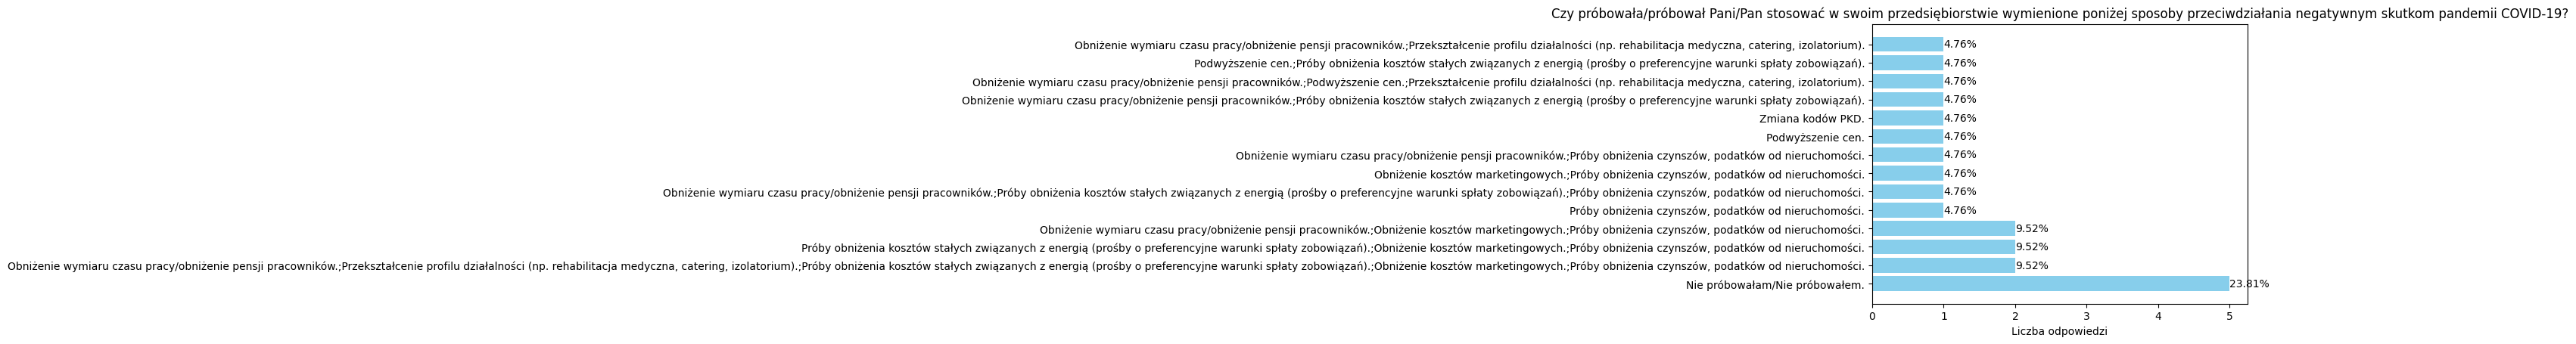

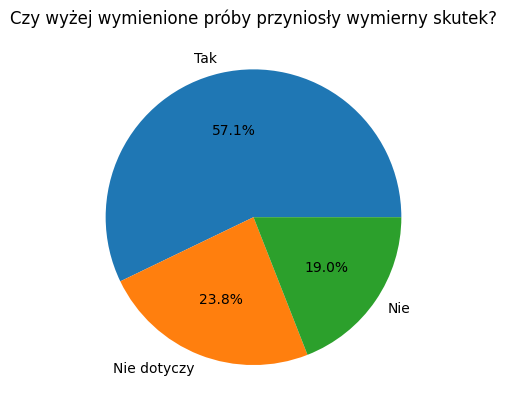

In [80]:
# percentage distribution of answers to questions
for i in range(5, 20):
    column_name = menagerial.columns[i]
    values_counts = menagerial[column_name].value_counts()

    if len(values_counts) <= 5:
        plt.pie(
            values_counts,
            labels=values_counts.index,
            autopct='%1.1f%%'
        )
    else:
        plt.barh(
            values_counts.index,
            values_counts,
            color='skyblue'
        )
        for index, value in enumerate(values_counts):
            plt.text(value, index, f'{value / sum(values_counts) * 100:.2f}%', ha='left', va='center')

        plt.xlabel('Liczba odpowiedzi')

    plt.title(column_name)
    plt.show()

## Checking the impact of the COVID-19 pandemic on the HoReCa industry from employees perspective.

In [87]:
employees=(df[df['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną']=='Pracownik']).dropna(axis=1, how='all')
employees.shape

(44, 20)

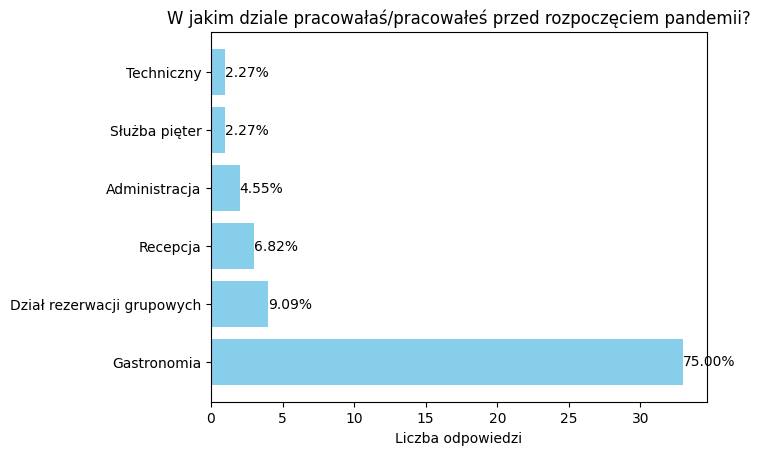

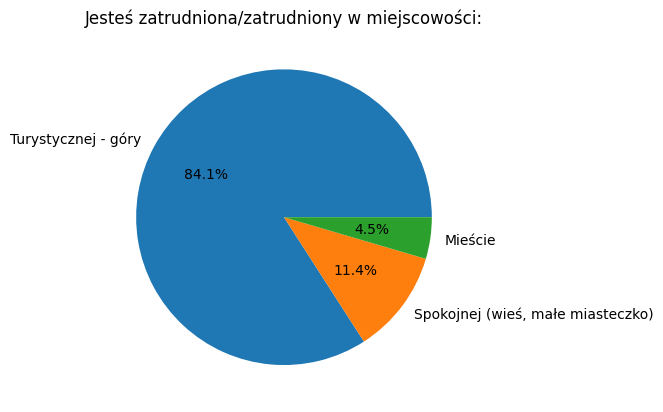

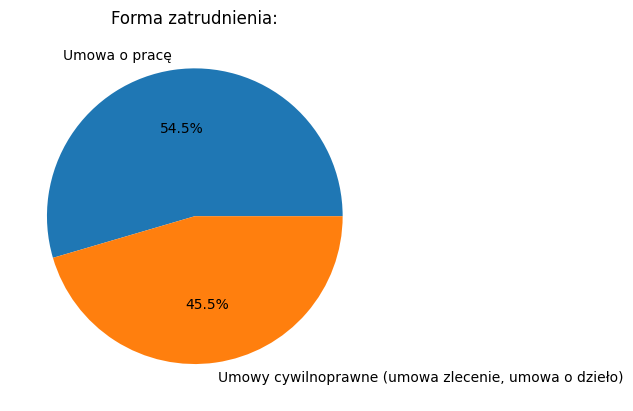

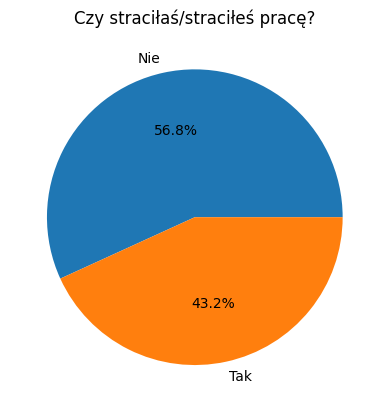

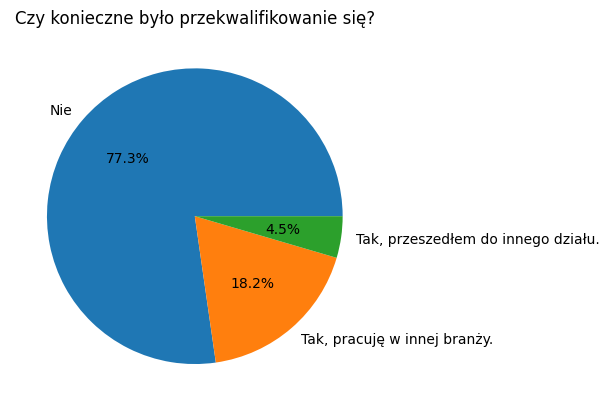

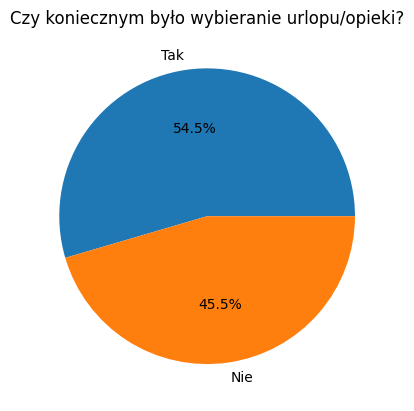

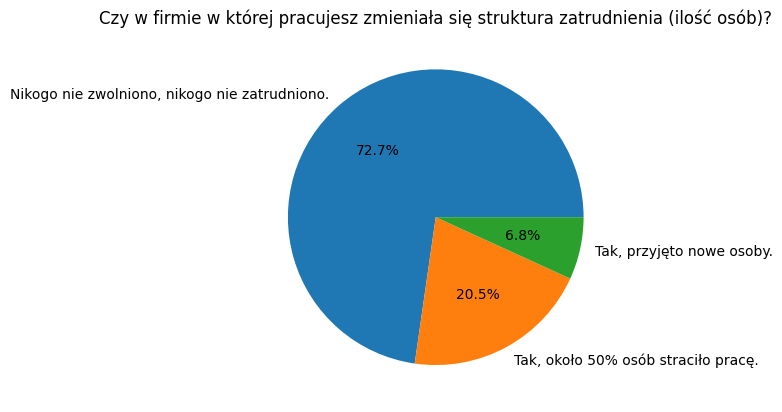

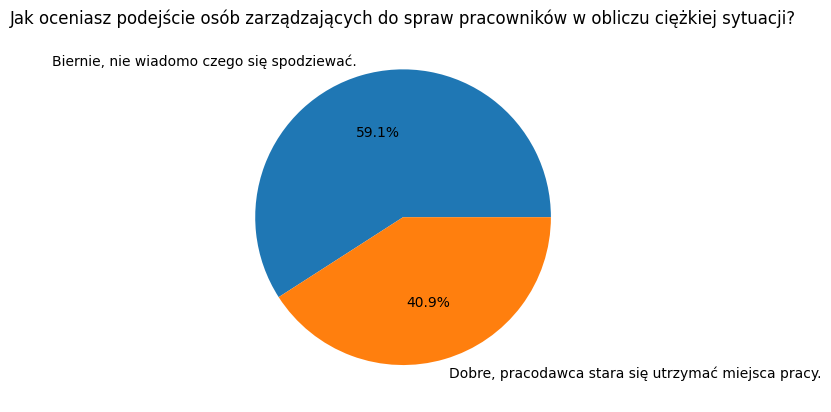

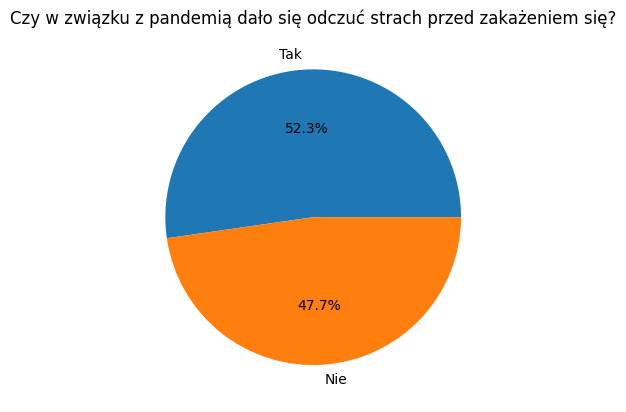

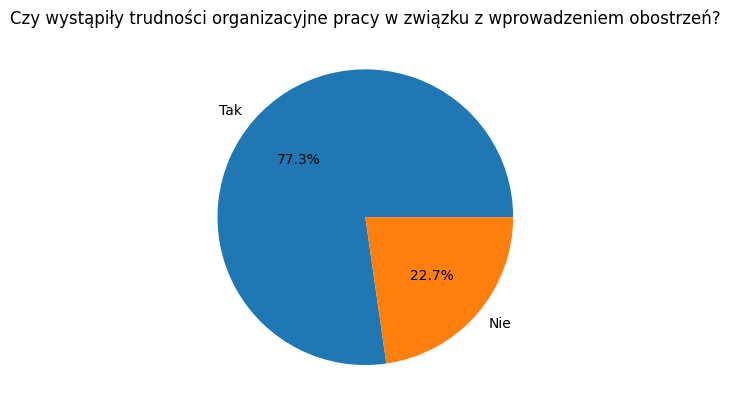

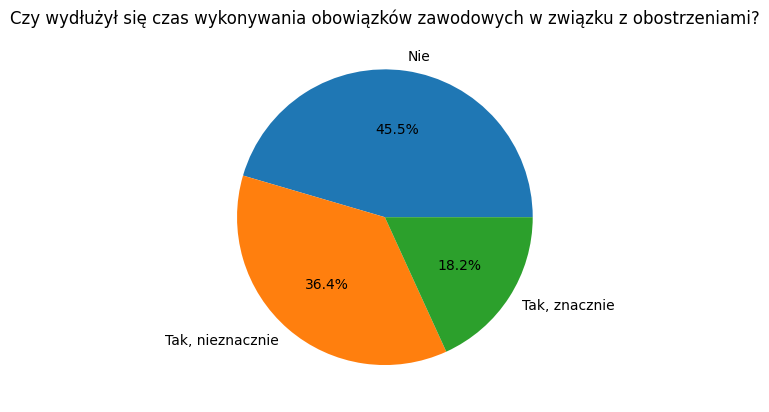

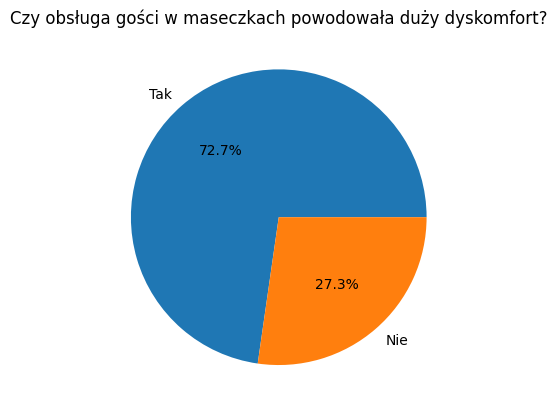

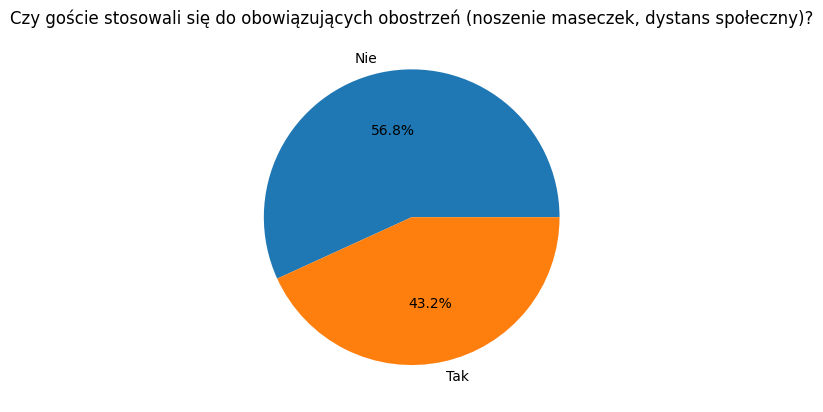

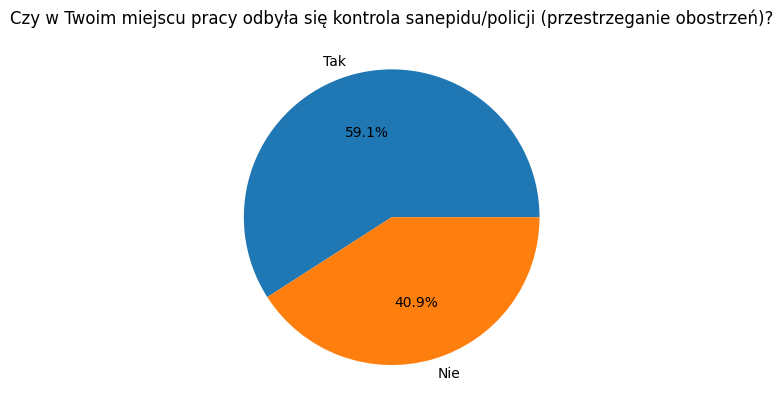

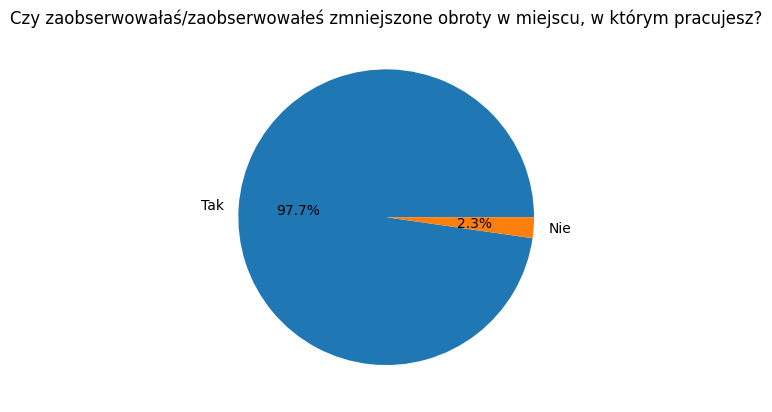

In [88]:
for i in range(5, 20):
    column_name = employees.columns[i]
    values_counts = employees[column_name].value_counts()

    if len(values_counts) <= 5:
        plt.pie(
            values_counts,
            labels=values_counts.index,
            autopct='%1.1f%%'
        )
    else:
        plt.barh(
            values_counts.index,
            values_counts,
            color='skyblue'
        )
        for index, value in enumerate(values_counts):
            plt.text(value, index, f'{value / sum(values_counts) * 100:.2f}%', ha='left', va='center')

        plt.xlabel('Liczba odpowiedzi')

    plt.title(column_name)
    plt.show()

## Checking the impact of the COVID-19 pandemic on the HoReCa industry from guests perspective.

In [90]:
guests=(df[df['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną']=='Konsument/gość']).dropna(axis=1, how='all')
guests.shape

(82, 19)

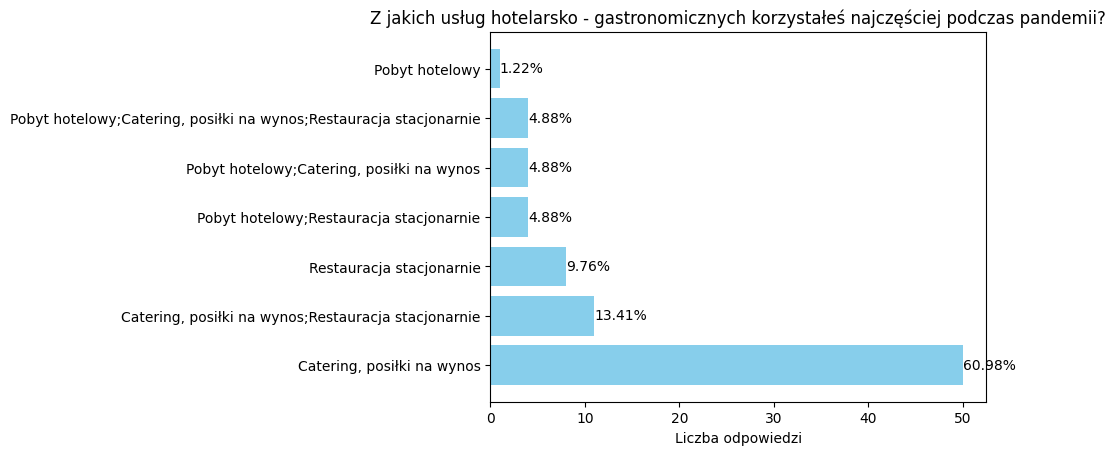

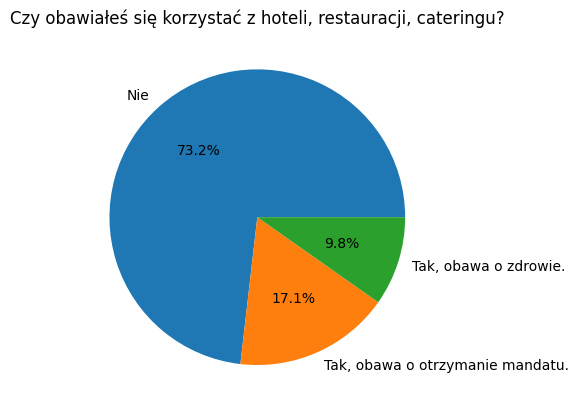

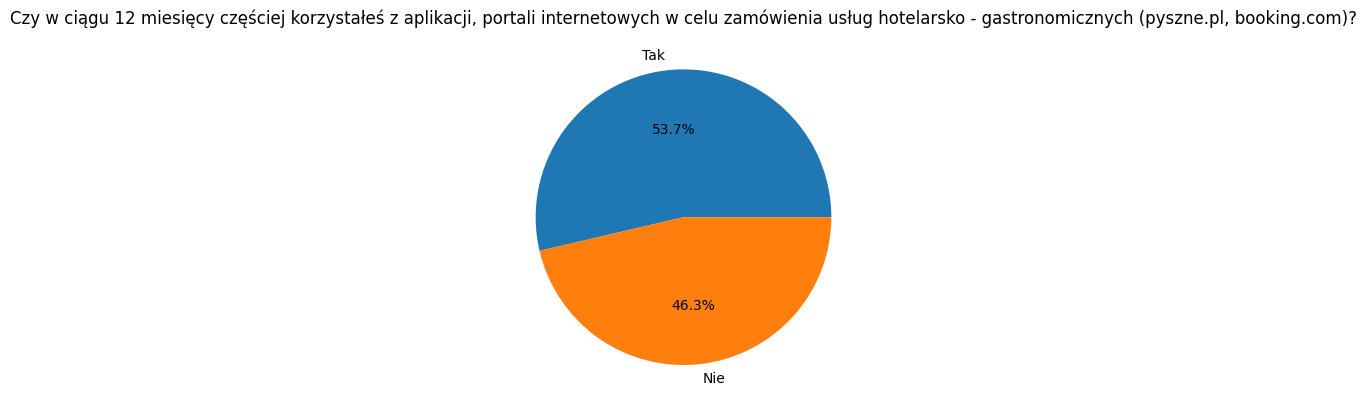

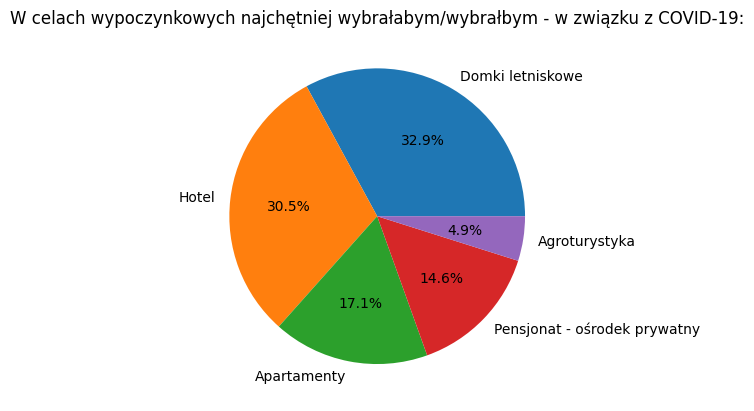

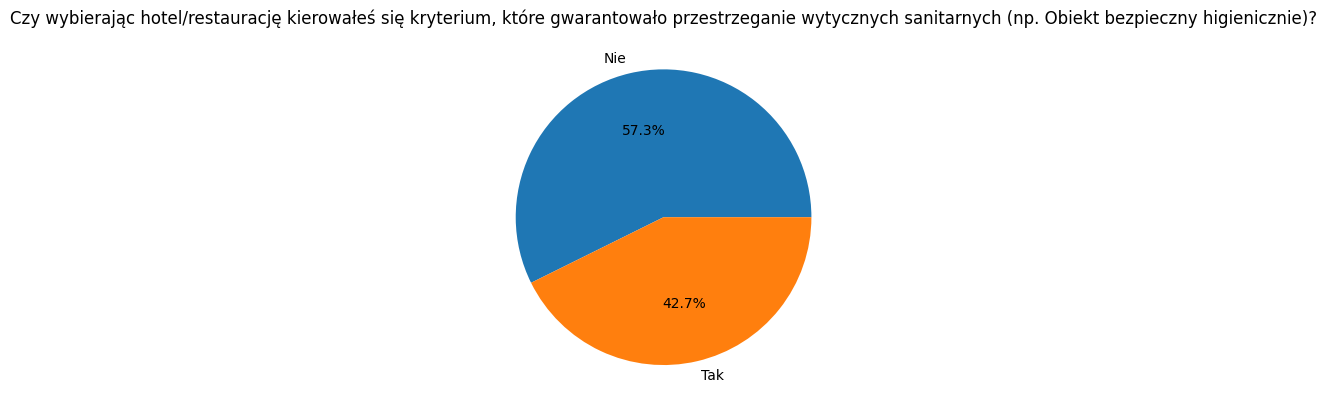

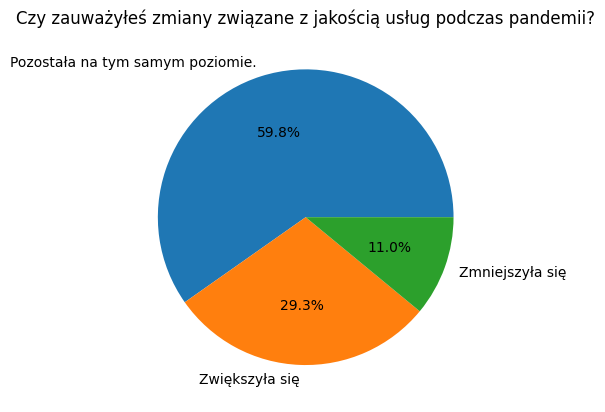

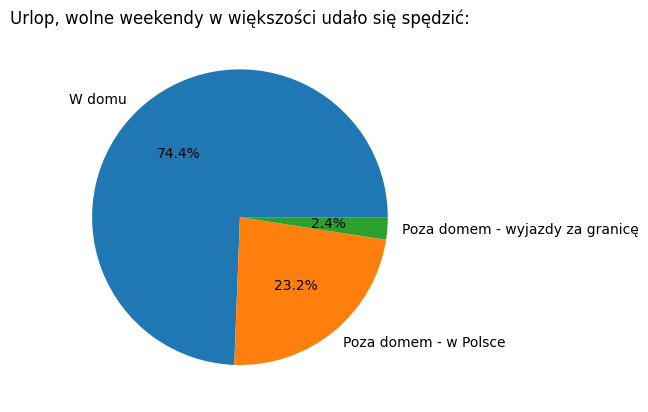

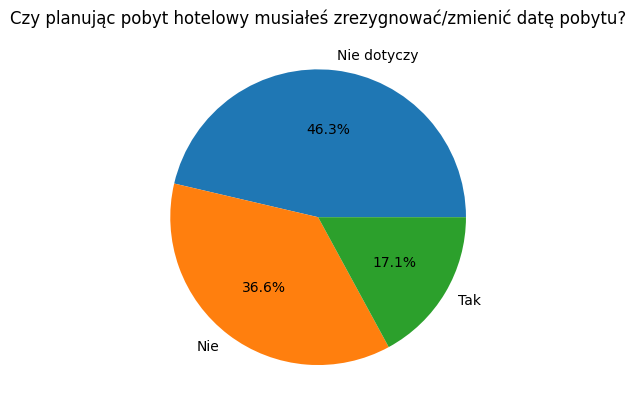

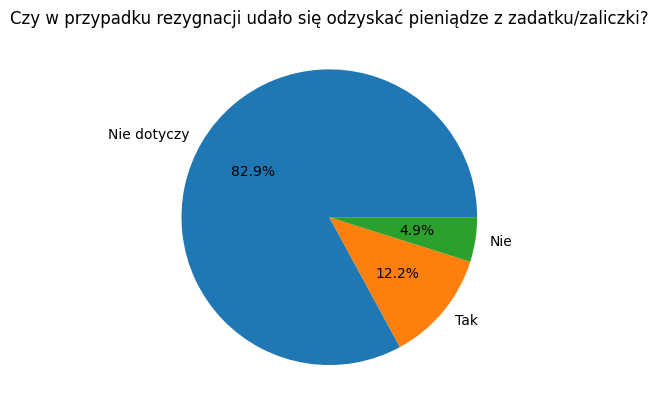

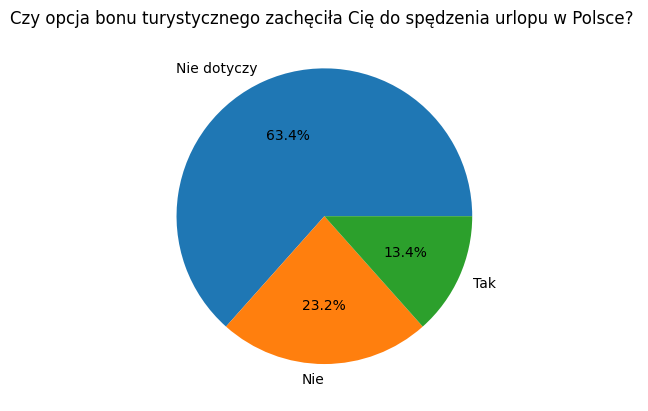

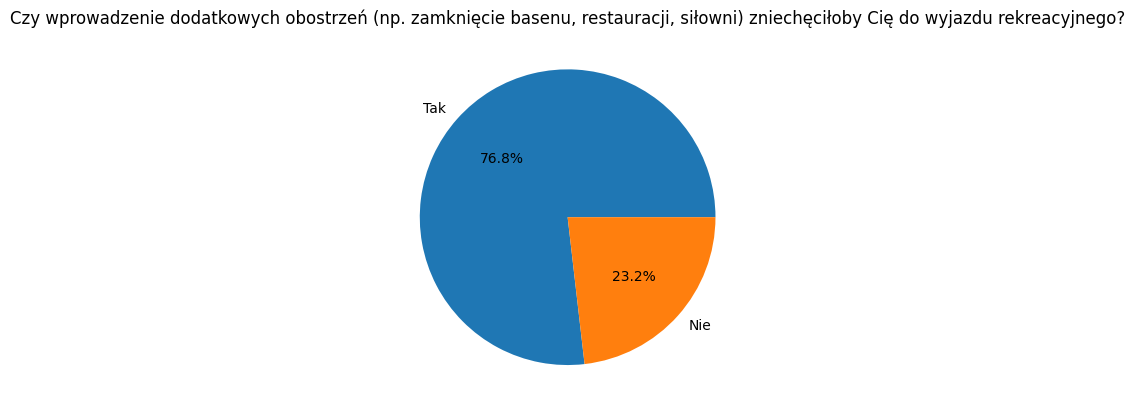

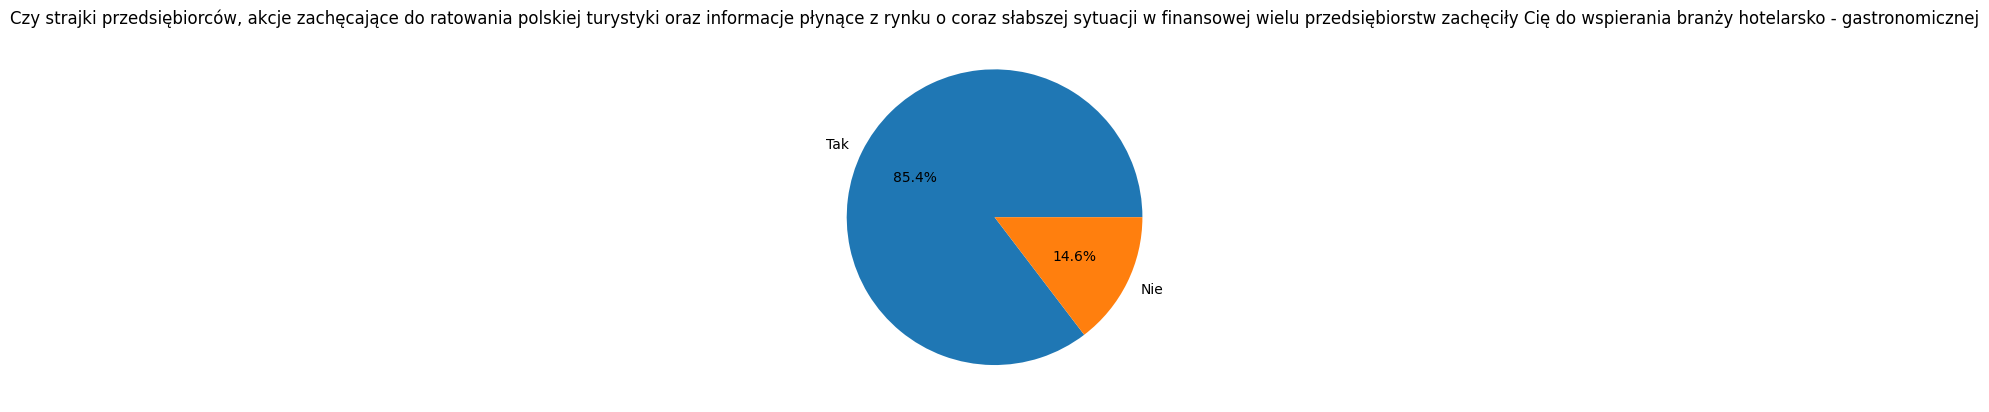

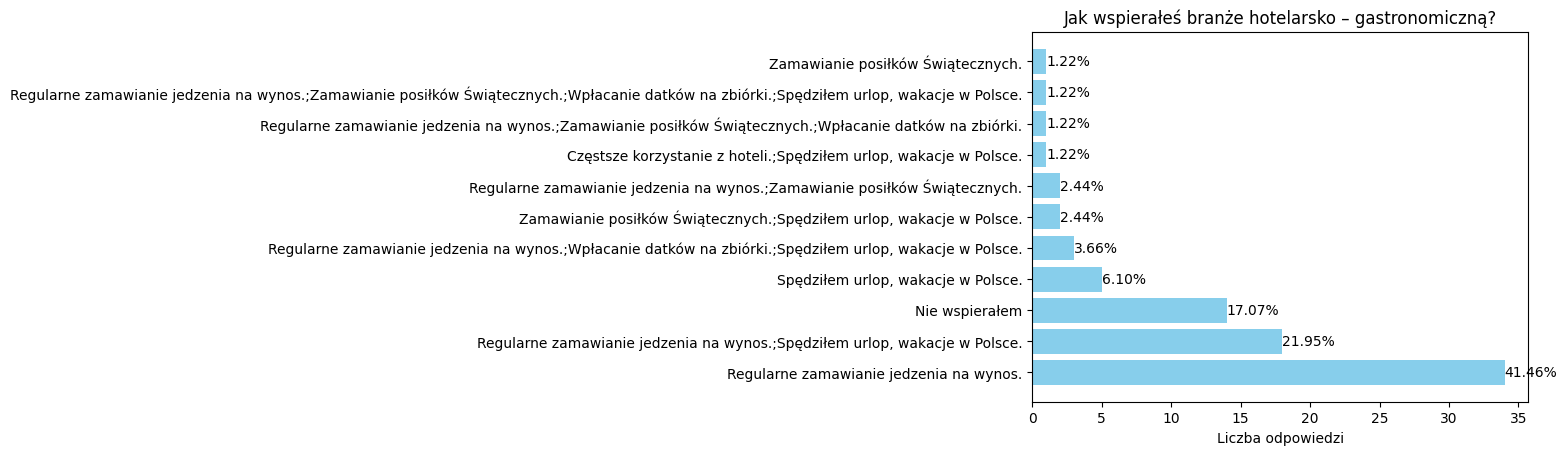

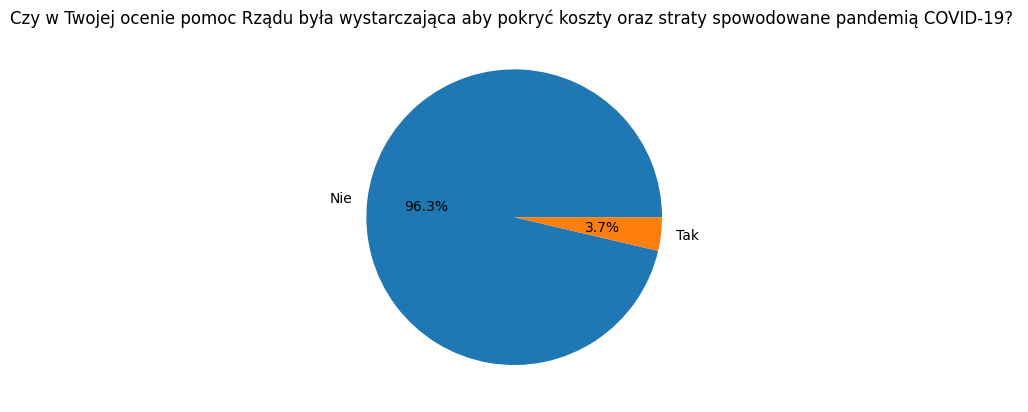

In [92]:
for i in range(5, 19):
    column_name = guests.columns[i]
    values_counts = guests[column_name].value_counts()

    if len(values_counts) <= 5:
        plt.pie(
            values_counts,
            labels=values_counts.index,
            autopct='%1.1f%%'
        )
    else:
        plt.barh(
            values_counts.index,
            values_counts,
            color='skyblue'
        )
        for index, value in enumerate(values_counts):
            plt.text(value, index, f'{value / sum(values_counts) * 100:.2f}%', ha='left', va='center')

        plt.xlabel('Liczba odpowiedzi')

    plt.title(column_name)
    plt.show()